# Curso de Python para Economistas
## Bienvenidos a la clase 5

### Anuncios y temario para hoy

- Pull de GitHub
- Cuestionario dificultad tarea
- Respuestas del cuestionario de los videos
- Dudas de la teoría
- Ejercicio práctico: Analisis de sentimiento de tweets de Joe Biden pre y post elecciones

### Cuestionario dificultad Tarea
https://forms.gle/yCLHV93TFNLd9Ug86

### Respuestas a las preguntas de los videos:
https://docs.google.com/forms/d/e/1FAIpQLSfb7zlEHh3gllD3iUUWwPCMwyQPd0Z04F3XpArSKQzPkYvGHA/viewform?usp=pp_url&entry.1318485631=Respuesta+Satisfactoria+(Successful+responses)&entry.330305262=Una+celda+de+una+tabla&entry.871102831=Tabula&entry.871102831=PyPDF2&entry.871102831=Minecart&entry.2076477619=La+puedo+trabajar+desde+python+con+el+paquete+psycopg2

### Analisis de sentimiento de tweets de Joe Biden pre y post elecciones

In [1]:
#importamos los paquetes a utilizar
import os
import re
import string
import pandas as pd
import numpy as np
import tweepy

import sys
#!{sys.executable} -m pip install wordcloud
from wordcloud import WordCloud
#!{sys.executable} -m pip install Pillow
from PIL import Image
import matplotlib.pyplot as plt


from textblob import TextBlob
from datetime import timezone as tz
from datetime import datetime
#Si alguien quiere trabajar con alguna cuenta en español podrían instalar 
#sentiment_analysis_spanish y utilizarlo en reemplado de TextBlob:
#!{sys.executable} -m pip install sentiment_analysis_spanish
#from sentiment_analysis_spanish import sentiment_analysis

import nltk
#nltk.download('stopwords')
# Si trabajan en español pueden crearse una lista de stopwords con las de este link:
# https://github.com/xiamx/node-nltk-stopwords/blob/master/data/stopwords/spanish
# También usaremos string.punctuation. Si trabajan en español podrian agregarle  
# ¿ y ¡ . En ingles incluye lo siguiente: !"#$%&'()*+, -./:;<=>?@[\]^_`{|}~
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize



Para generar las claves vayan a: 
https://developer.twitter.com/en/portal/dashboard

- Luego a Projects & Apps
- Luego Overview
- Luego + Create App

Crear con algun editor de texto (ej. Sublime) un archivo llamado `twitter_keys.txt` dentro de la carpeta `clase5` y guardar las 4 claves, una por línea, en el siguiente orden:
- API key
- API key secret
- Access token
- Access token secret

In [3]:
#Creamos variables que contienen nuestas claves de autenticación con la API
with open("twitter_keys.txt") as tw_k: 
    consumer_key = tw_k.readline().strip()
    consumer_secret = tw_k.readline().strip()
    access_key = tw_k.readline().strip()
    access_secret = tw_k.readline().strip()

In [4]:
#Le pasamos nuestras credenciales de twitter a tweepy
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth)

En este link pueden explorar detalles del metodo user_timeline: https://docs.tweepy.org/en/stable/api.html?highlight=user_timeline#tweepy.API.user_timeline

In [5]:
def get_all_tweets(screen_name, start_date):
    '''
    Esta funcion recibe el nombre de la persona de quien queremos extraer los 
    tweets y devuelve una lista con todos los tweets y sus datos
    Input: 
      screen_name (str): el nombre de la persona en twitter
    Output:
      all_tweets (lista): lista con todos los tweets extraidos
    '''
    # Solicitamos los 200 tweets mas recientes (200 es el maximo permitido en count)
    new_tweets = api.user_timeline(screen_name=screen_name, 
                                   tweet_mode="extended", count=200)
    # Creo una lista para almacenar TODOS los tweets y agrego los recién extraidos
    all_tweets = []
    all_tweets.extend(new_tweets)
    # guardo el id del ultimo tweet extraído 
    oldest = all_tweets[-1].id 
    
    # Extraigo tweets de a 200 hasta que no haya más
    while len(new_tweets) > 0 and all_tweets[-1].created_at > start_date:
        # Solicito 200 tweets mas y los agrego a la lista de 'all_tweets'
        new_tweets = api.user_timeline(screen_name=screen_name, count=200,
                                       tweet_mode="extended", max_id=oldest-1)
        all_tweets.extend(new_tweets)
        # Actualizo el id del ultimo tweet extraído
        oldest = all_tweets[-1].id 
        print("Hasta ahora se han extraido %s tweets" % len(all_tweets))

    return all_tweets


In [8]:
# Extraemos los tweets desde unos días antes de las elecciones del 
# 3 de Noviembre de 2020

#De estas dos opciones usen la que les funcione y comenten la otra:
#date_before_elections = datetime(2020, 10, 16, 0, 0, 0, tzinfo=tz.utc)
date_before_elections = datetime(2020, 10, 16, 0, 0, 0)

all_tweets_biden = get_all_tweets("JoeBiden", date_before_elections)

Hasta ahora se han extraido 400 tweets
Hasta ahora se han extraido 600 tweets
Hasta ahora se han extraido 800 tweets
Hasta ahora se han extraido 1000 tweets
Hasta ahora se han extraido 1200 tweets
Hasta ahora se han extraido 1400 tweets


In [27]:
#Veamos la lista con los primeros 5 objetos de tweepy
all_tweets_biden[:5]

[Status(_api=<tweepy.api.API object at 0x7fecf8a9e610>, _json={'created_at': 'Wed Oct 20 19:02:18 +0000 2021', 'id': 1450900197043757058, 'id_str': '1450900197043757058', 'full_text': 'RT @POTUS: The sacred right to vote is under unrelenting assault across the country — and the Senate needs to take action to protect it. Se…', 'truncated': False, 'display_text_range': [0, 140], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'POTUS', 'name': 'President Biden', 'id': 1349149096909668363, 'id_str': '1349149096909668363', 'indices': [3, 9]}], 'urls': []}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 939091, 'id_str': '939091', 'name': 'Joe Biden', 'screen_name': 'JoeBiden', 'location': 'Washington, DC', 'description': 'Husband to @DrBiden, proud fa

In [28]:
# Veamos un solo tweet 
all_tweets_biden[8]

Status(_api=<tweepy.api.API object at 0x7fecf8a9e610>, _json={'created_at': 'Sat Oct 16 23:51:00 +0000 2021', 'id': 1449523302104457217, 'id_str': '1449523302104457217', 'full_text': 'It’s time to build an economy that works for working families. An economy where people from every race, background, and religion can get ahead.\n\nOur Build Back Better Agenda will get it done.', 'truncated': False, 'display_text_range': [0, 191], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}, 'source': '<a href="https://sproutsocial.com" rel="nofollow">Sprout Social</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 939091, 'id_str': '939091', 'name': 'Joe Biden', 'screen_name': 'JoeBiden', 'location': 'Washington, DC', 'description': 'Husband to @DrBiden, proud father and grandfather. Ready to build back better for all Americans. Official accou

In [29]:
# Veamos el texto de un solo tweet 
all_tweets_biden[8].full_text

'It’s time to build an economy that works for working families. An economy where people from every race, background, and religion can get ahead.\n\nOur Build Back Better Agenda will get it done.'

#### Ejercicio 1: 
En la siguiente función construyan un loop que extraiga id_str, created_at, full_text, retweeted,  favorite_count, in_reply_to_screen_name de cada tweet y lo guarde en una lista. Esa lista se debe agregar al final de la lista all_tweets_selection para luego construir un df con la lista de listas (las listas internas serán las filas del df). 

In [30]:
def save_tweets_text(all_tweets, csv_file=None):
    '''
    Esta función guarda los tweets en un data frame y si se especifica un 
    archivo csv tambien se guardaran ahí 
    Input:
        all_tweets (lista): lista con tweets y sus datos
        csv_file ('str'): nombre del archivo csv
    Output:
        df_all_tweets (df): tweets ordenados en una tabla con datos seleccinados
    '''
    all_tweets_selection = []
    
    for tweet in all_tweets:
        temp = [tweet.id_str, tweet.created_at, tweet.full_text, 
                tweet.retweeted, tweet.favorite_count, 
                tweet.in_reply_to_screen_name]
        all_tweets_selection.append(temp)
   
    df_all_tweets = pd.DataFrame(all_tweets_selection)
    df_all_tweets.columns = ['id_str', 'created_at', 'text', 'retweeted',
                            'favorite_count', 'in_reply_to_screen_name']
    if csv_file:
        df_all_tweets.to_csv(csv_file, index=False, encoding="utf-8")

    return df_all_tweets

#### Ejercicio 1b: 
Utilicen la función save_tweets_text para construir una tabla con todos los tweets y guardenlo en una archivo llamado "tweets.csv". Por ultimo visualicen algunas filas de la tabla. 

In [32]:
df_all_tweets = save_tweets_text(all_tweets_biden, csv_file="tweets.csv")
df_all_tweets

,id_str,created_at,text,retweeted,favorite_count,in_reply_to_screen_name
0,1450900197043757058,2021-10-20 19:02:18,RT @POTUS: The sacred right to vote is under u...,False,0,None
1,1450471875382059018,2021-10-19 14:40:18,Building back better starts in the states. Sin...,False,7202,None
2,1450203535065460742,2021-10-18 20:54:00,"For the better part of the 20th century, Ameri...",False,17799,None
3,1450168825790541830,2021-10-18 18:36:05,RT @POTUS: Jill and I are deeply saddened by t...,False,0,None
4,1450148676899418118,2021-10-18 17:16:01,"Folks, Virginia has an important election comi...",False,6683,None
...,...,...,...,...,...,...
1395,1316840627817066496,2020-10-15 20:37:26,Not only was the individual 50+ feet away and ...,False,34981,JoeBiden
1396,1316840452235186178,2020-10-15 20:36:44,"During our contact tracing, we discovered arou...",False,81814,None
1397,1316831214821548033,2020-10-15 20:00:01,Donald Trump is rushing through Justice Ginsbu...,False,12291,None
1398,1316819884081393667,2020-10-15 19:15:00,President Obama and I left Donald Trump a boom...,False,319094,None


 #### Ejercicio 1c: 
 Hagan print del texto de algunos tweets y luego piensen:
 
 1) Les parece que podríamos hacer un análisis de sentimiento de estos tweets como están?
 
 2) Porque?
 
 3) Que errores creen que podriamos tener al trabajar con el texto tal como lo descargamos de twitter?
 
 4) Que transformaciones le harían al texto antes de meterlo en el análisis (mencionen al menos 5 cosas)

In [33]:
# Emoticones contentos
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])
 
# Emoticones Tristes
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])

# Combinamos emoticones contentos y tristes
emoticons = emoticons_happy.union(emoticons_sad)

In [34]:
#Emoji patterns
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # simbolos & pictogramas
                           u"\U0001F680-\U0001F6FF"  # transporte & simbolos mapas
                           u"\U0001F1E0-\U0001F1FF"  # banderas (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)


In [35]:
def clean_tweet(tweet):
    '''
    Esta función limpia el texto de un tweet. Elimina caracteres especificos que
    se utilizan en twitter como los de re-tweets, los links y otros Non-ASCII.
    Devuelve el texto "limpio".
    Input:
        tweet (str): Texto del tweet original
    Output:
        tweet (str): Texto del tweet limpiado
    '''   
    #Saco los links
    tweet = re.sub(r'https.*', '', tweet)
    #Elimino caracteres de re-tweets   
    tweet = re.sub(r'^RT .*:', '', tweet)
    tweet = re.sub(r'@\S+', '', tweet)
    tweet = re.sub(r':', '', tweet)
    tweet = re.sub(r'‚Ä¶', '', tweet)
    #Reemplazo caracteres non-ASCII con espacio
    tweet = re.sub(r'[^\x00-\x7F]+',' ', tweet)
    
    return tweet
    

In [36]:
#Este es un tweet sucio:
df_all_tweets['text'][1]

'Building back better starts in the states. Since flipping the legislature in 2019, Virginia Democrats have been a model of progress—including helping us vaccinate folks to beat the pandemic. To keep our progress, we must elect @TerryMcAuliffe and Democrats up and down the ballot. https://t.co/NsJiiPNzlv'

In [37]:
#Este es un tweet limpio:
tweet_cleaned = clean_tweet(df_all_tweets.iloc[1]['text'])
tweet_cleaned

'Building back better starts in the states. Since flipping the legislature in 2019, Virginia Democrats have been a model of progress including helping us vaccinate folks to beat the pandemic. To keep our progress, we must elect  and Democrats up and down the ballot. '

#### Análisis de Sentimiento
https://textblob.readthedocs.io/en/dev/api_reference.html#module-textblob.en.sentiments
- Polarity: Negative (-1.0) vs. Positive (1.0)
- Subjectivity: Objective (0.0) vs. Subjective (1.0)

In [38]:
# Calculamos el sentimiento con el metodo TextBlob
blob = TextBlob(tweet_cleaned)
Sentiment = blob.sentiment
polarity = Sentiment.polarity
subjectivity = Sentiment.subjectivity  
print("La polaridad de este tweet es :", polarity)

La polaridad de este tweet es : 0.2861111111111111


#### Ejercicio 2:
Construyamos un loop que nos permita limpiar todos los strings y concatenarlos. Al tenerlos todos concatenados será más facil utilizarlos en un grafico, como por ejemplo una nube de pablabras 

In [40]:
all_tweets_cleaned = ''
all_tweets = ''
for index, row in df_all_tweets.iterrows():
    all_tweets += row.text
    clean_text = clean_tweet(row.text)
    all_tweets_cleaned += clean_text


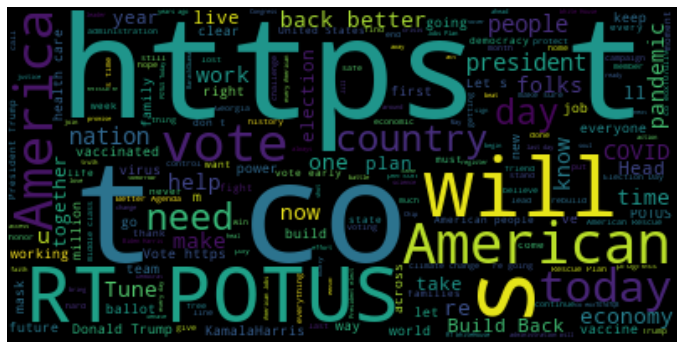

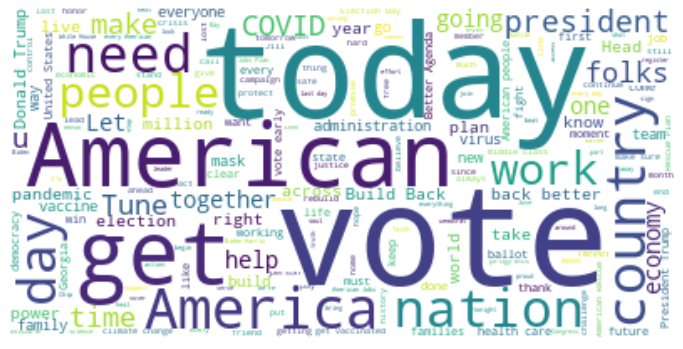

In [41]:
# Generamos una imagen de nube de palabras 
# wordcloud = WordCloud().generate(all_tweets_cleaned)

wordcloud = WordCloud().generate(all_tweets) #prueben incluir: max_font_size=40
plt.figure(figsize=(12,9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


wordcloud = WordCloud(background_color = 'white', stopwords = stopwords.words('english')).generate(all_tweets_cleaned)
plt.figure(figsize=(12,9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()



In [ ]:
with Image.open('upvote.png') as im:
    im.rotate(45).show()

(-0.5, 4095.5, 3071.5, -0.5)

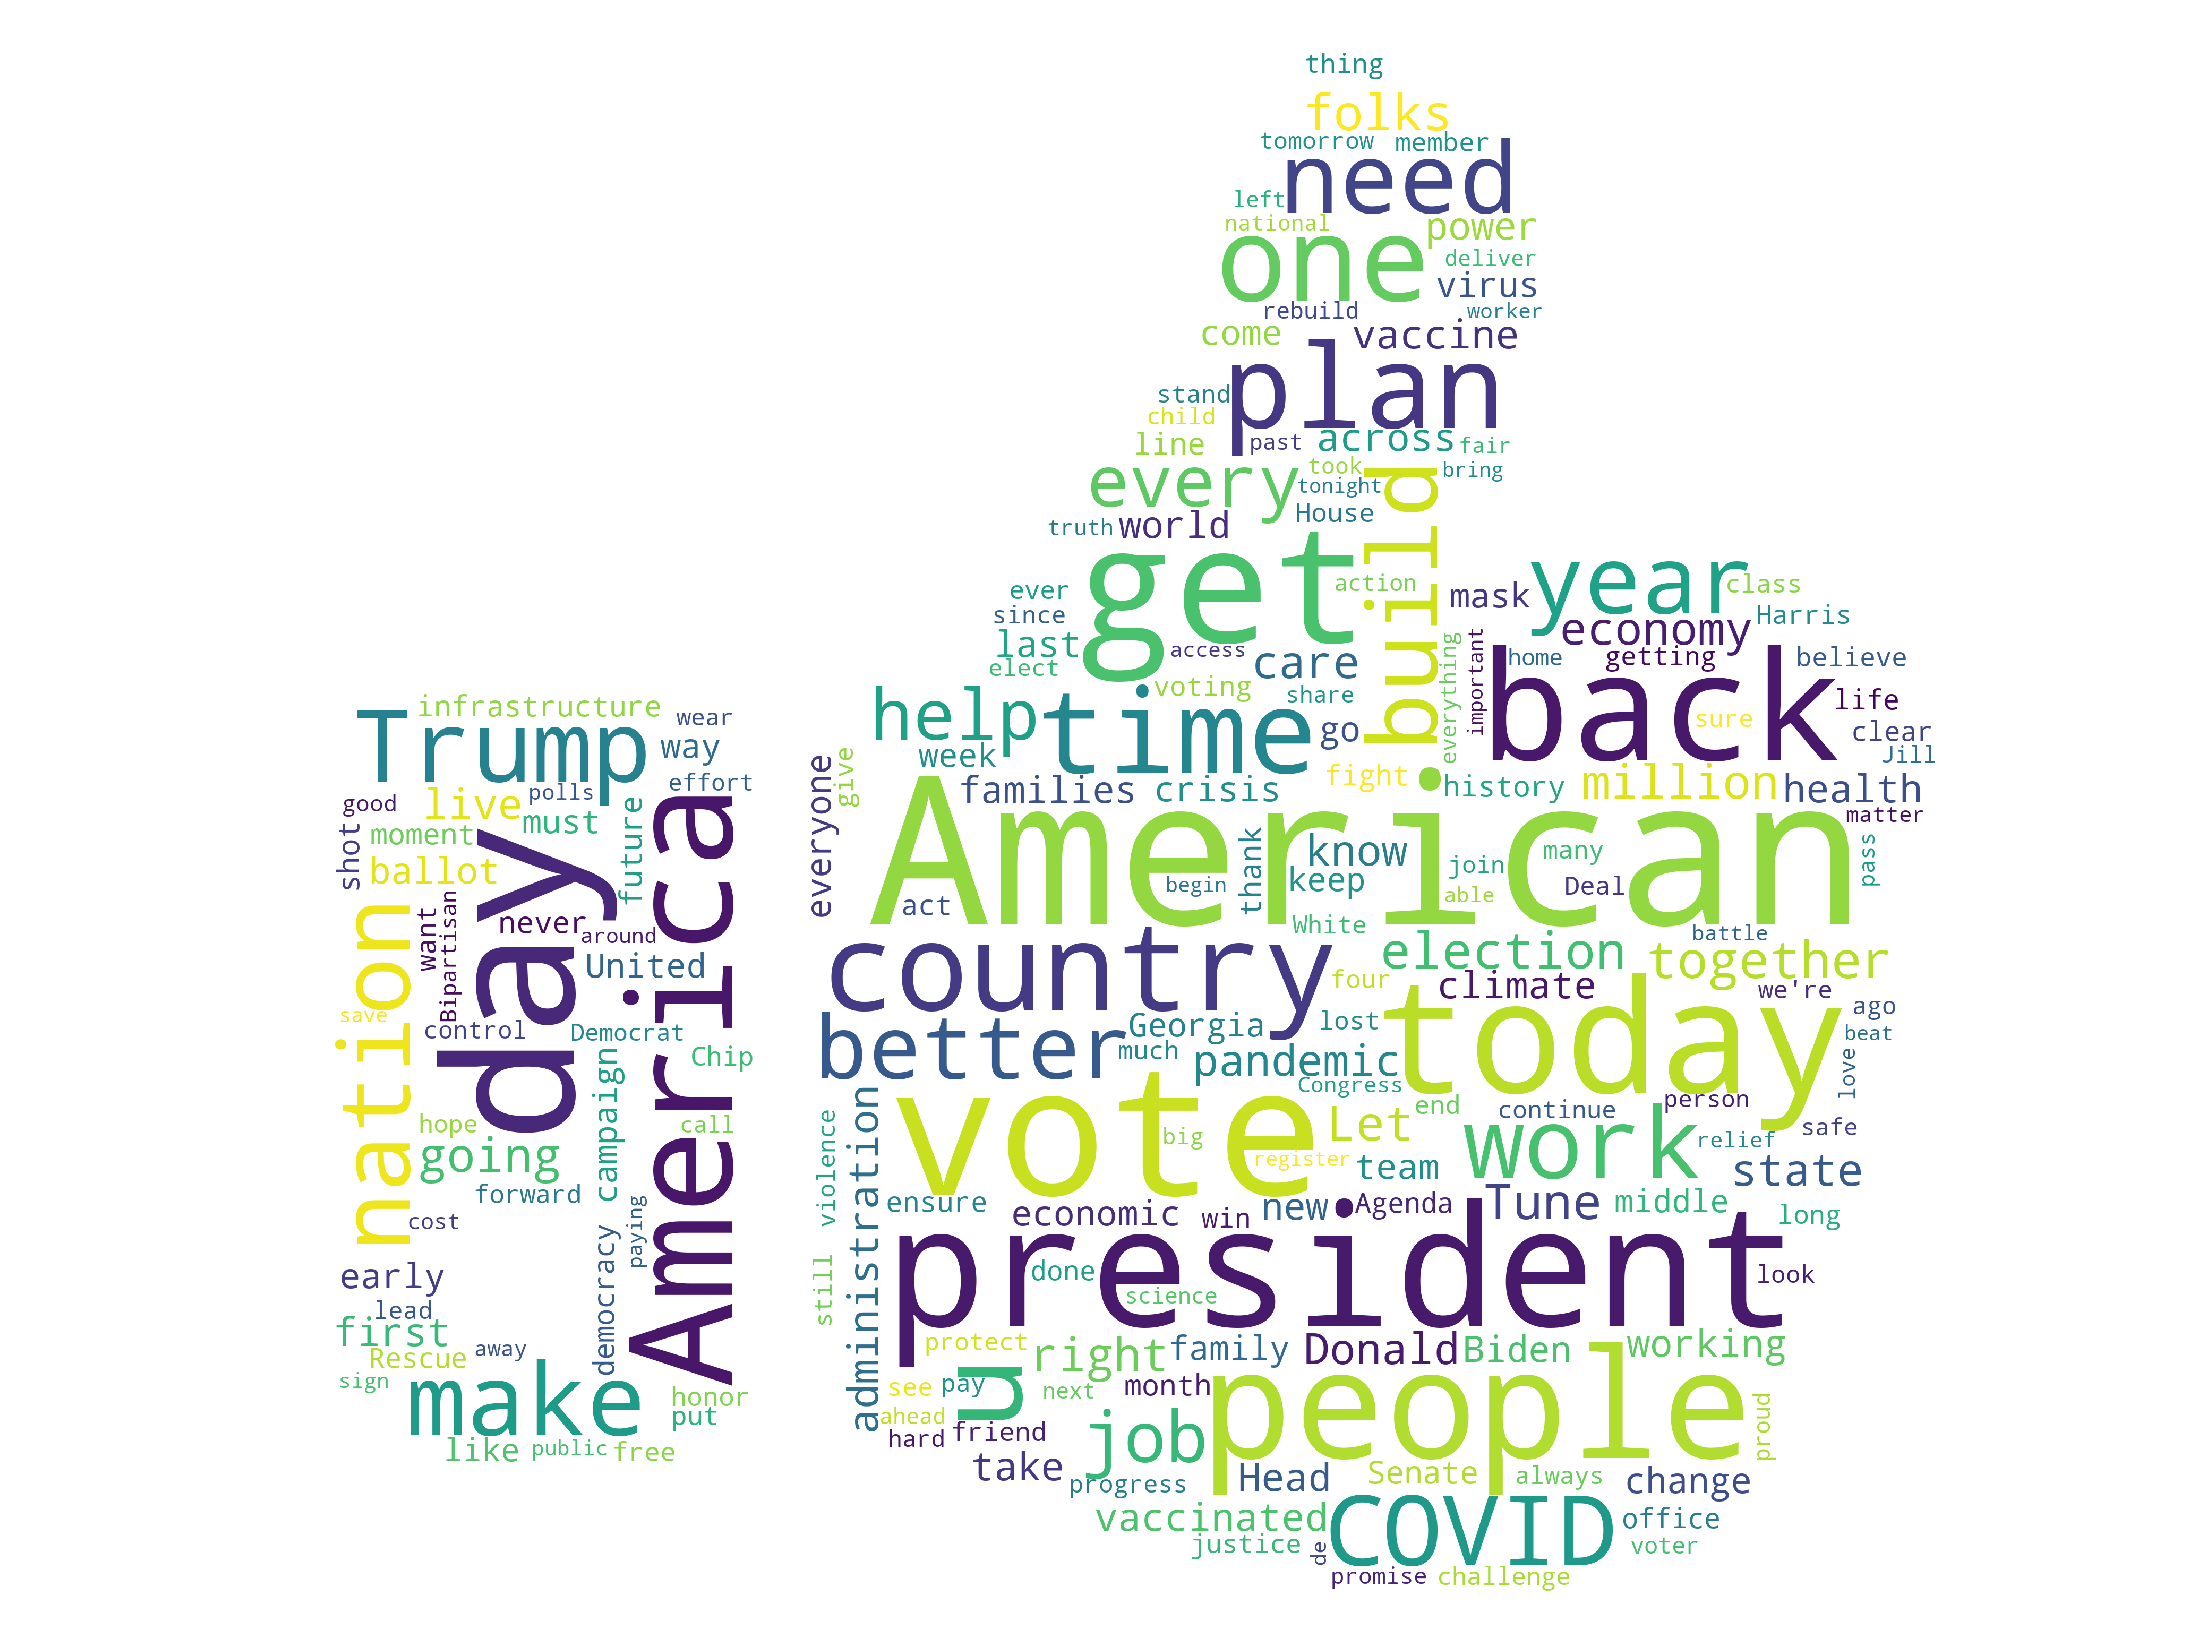

In [42]:
# Import image to np.array
mask = np.array(Image.open('upvote.png'))

# Generate wordcloud
wordcloud = WordCloud(width = 3000, height = 2000, background_color='white', 
                      collocations=False, stopwords = stopwords.words('english'), 
                      mask=mask).generate(all_tweets_cleaned)

plt.figure(figsize=(40, 30))
plt.imshow(wordcloud) 
plt.axis("off")

Nota: La imagen del dedo la tomé como idea de este blog https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5

## Curso Python para Economistas
### Trabajo Práctico Nº 5

### Fecha de entrega:
Jueves 28/10 a las 18:00 hs

### Modalidad de entrega y trabajo
- Este TP es **grupal**.
- Un miembro del grupo debe crear un repositorio **privado** en GitHub, y dar acceso a sus compañeros y a los 5 profesores.
- **Todos los miembros del grupo deben haber hecho al menos un commit con contribuciones sustanciales**.
- Corroborar que el nombre de usuario que tienen configurado para `git` es el mismo nombre de usuario de GitHub. Para hacer esto, se puede correr `git config --list` en `cmd` oterminal.
- Cuando hayan hecho ese último commit, copien la URL para clonar su repositorio y péguenla en
[este Google Sheet](https://docs.google.com/spreadsheets/d/1FRdH1ccczm5-rPZs57ZsvPdEGTDq8dkYorF3UwZdDHA/edit?usp=sharing), en la hoja del TP5. Agreguen los nombres de los integrantes del grupo. Al ser un repositorio privado, solo los colaboradores habilitados podrán clonarlo.
- Al finalizar el trabajo práctico deben hacer un último commit y push en su repositorio de GitHub con el mensaje `"Entrega final del TP5"`. Antes de la fecha y hora de entrega pueden hacer cuantos cambios quieran en el repositorio, pero luego de la hora de corte no deben hacer más cambios. Si un commit con el mensaje anterior se realiza luego de la hora de entrega, se supondrá que la entrega tardía fue intencional y se utilizarán los días de gracia. La última versión en el repositorio es la que será evaluada. Para esto es importante que no completen el Google Sheet hasta que no hayan finalizado el TP, como tampoco hacer pushes posteriores a la entrega.

#### Ejercicio 1:
Creen una función que limpie cualquier tipo de texto. Esta debe eliminar emoticones, emojis, palabras vacías (también llamadas stop words en la libreria de nltk), puntuaciones, etc. 

Además, cuando el parametro is_tweet este seteado en True, la función debe eliminar indicaciones de retweets, links y cualquier otra particularidad de los tweets que crean relevante eliminar. 

Prueben el funcionamiento de su función con el texto a continuación

In [60]:
texto = "She's got a smile :) that it seems to me. Reminds me of childhood memories. Where everything was as fresh as the bright blue sky. Now and then when I see her face \U0001F600 . She takes me away to that special place. And if I stare too long, I'd probably break down and cry :'( Whoa, oh, oh. Sweet child o' mine. Whoa, oh, oh, oh. Sweet love of mine. She's got eyes of the bluest skies. As if they thought of rain. I'd hate to look into those eyes and see an ounce of pain. Her hair reminds me of a warm safe place. Where as a child I'd hide. And pray for the thunder and the rain to quietly pass me by. Where do we go? Where do we go now? Where do we go? Ooh, oh, where do we go? Where do we go now? \U0001F3B8 https://www.youtube.com/watch?v=1w7OgIMMRc4"
print(texto)

She's got a smile :) that it seems to me. Reminds me of childhood memories. Where everything was as fresh as the bright blue sky. Now and then when I see her face 😀 . She takes me away to that special place. And if I stare too long, I'd probably break down and cry :'( Whoa, oh, oh. Sweet child o' mine. Whoa, oh, oh, oh. Sweet love of mine. She's got eyes of the bluest skies. As if they thought of rain. I'd hate to look into those eyes and see an ounce of pain. Her hair reminds me of a warm safe place. Where as a child I'd hide. And pray for the thunder and the rain to quietly pass me by. Where do we go? Where do we go now? Where do we go? Ooh, oh, where do we go? Where do we go now? 🎸 https://www.youtube.com/watch?v=1w7OgIMMRc4


In [ ]:
def clean_text(text, is_tweet=False):
    '''
    Esta función limpia el caulquier texto. Elimina emoticones, emojis, palabras
    vacías (también llamadas stop words en la libreria de nltk), links, puntuaciones
    indicaciones de retweets, etc. Devuelve solo un string solo con las palabras  
    con mayor contenido para el analisis.
    Input:
        text (str): Texto original
        is_tweet (bool): si el texto es un tweet este parametro debe setearse a 
                         True para que también se limpie el texto con los 
                         caracteres más especificos de twitter (usa clean_tweet) 
    Output:
        text (str): Texto limpiado
    '''


#### Ejercicio 2:
Construyan una función que reciba una fecha a testear y dos fechas limite. La función debe chequear si la fecha a testear cae entre las dos fechas limites y devolver True cuando lo haga y False cuando no. 

Prueben si su función anda como esperaban con las fechas sugeridas a continuación (y con otras opciones de date para asegurarse que funcione bien):

In [65]:
date = datetime.strptime("2020-11-03", '%Y-%m-%d')
start_time = datetime.strptime("2020-10-20", '%Y-%m-%d')
end_time = datetime.strptime("2020-11-18", '%Y-%m-%d')

In [66]:
def filter_year_and_month(date, start_time, end_time):
    '''
    Recibe una fecha y devuelve True, si la fecha de la fila esta 
    dentro de los dias especificados como inicio y fin, caso 
    contrario False.
    '''


#### Ejercicio 3:
Construyan una función que genere un indicador de sentimiento positivo o negativo.

Si estan trabajando con tweets en inglés pueden usar sentiment.polarity de TextBlob.

Si estan trabajando con tweets en Español pueden usar sentiment_analysis de sentiment_analysis_spanish

Prueben su función con el texto del ejercicio 1.

In [ ]:
def generate_sentiment(text):
    '''
    Esta funcion limpia el texto y analiza el sentimiento.
    Input:
        text (str): texto a limpiar y analizar
    Output:
         sentimiento (float): cuanto menor sea el número más negativo es el texto y cuanto
                           cuanto mayor más positivo.
    '''

#### Ejercicio 4:
Construyan una función que reciba un texto y detecte caritas creadas con caracteres y caritas de UNICODE. Debe devolver una tupla que contenga dos booleanos. El primer booleano indicará si había (True) o no (False) caritas tristes y el segundo si había (True) o no (False) caritas tristes.

Prueben esta función con el texto del ejercicio 1.

In [ ]:
def detect_sad_happy_icons(text):
    '''
    Esta funcion detecte caritas creadas con caracteres y caritas de UNICODE
    Input:
        text (str): texto en el cual buscar las caritas
    Output:
        sad, happy (bool, bool): Indican si había (True) o no (False) caritas 
                                 tristes y felices
    '''


#### Ejercicio 5:
Elijan la cuenta de twitter de algún usuario público y algún periodo o evento que pueda haber sido importante para esa persona/cuenta y le pueda haber hecho cambiar el sentimiento de sus post. Expliquen muy brevemente su elección.

Repitan los pasos que hemos realizado en clase para construir la tabla llamada `df_all_tweets` (la construimos en el ejercicio 1). 

No es necesario que copien las funciones vistas durante la clase sincrónica. Simplemente llamenlas a continuación con la nueva cuenta de twitter que quieran analizar. 

##### Expliquen muy brevemente su elección de cuenta y periodo acá:

#### Ejercicio 6:
Construyan una función que utilice las 4 funciones creadas previamente (ej.1 al 4). Los argumentos de esta función deben ser un df y el rango de fechas que quieren analizar. 

Esta función debe limpiar el texto de los tweets, filtrar los tweets que correspondan a fechas dentro del rango que ustedes eligieron en el punto 5, calcular el sentimiento del texto y buscar si tiene caritas.

Finalmente, la función debe devolver un data frame que solo tenga tweets posteados en el periodo que ustedes eligieron, y que tenga 4 nuevas columnas, una para el texto limpio, otra para el sentimiento y dos más que indiquen si el texto tenía caritas tristes y felices. 

Utilicen esta función sobre el dataframe `df_all_tweets` que armaron en el punto 5. 

In [ ]:
def add_sentiment(df, start_time, end_time):
    '''
    Esta funcion debe limpia el texto de los tweets, filtra los tweets que
    correspondan al periodo entre start_time y end_time, calcula el sentimiento 
    del texto y buscar si tiene caritas.
    Input:
        df (dataframe): tabla con los tweets en una columa llamada text
        start_time (datetime): fecha del tweet más antiguo a conservar
        end_time (datetime): fecha del tweet más reciente a conservar
    Output:
        df (dataframe): df actualizado con el filtro y las nuevas columnas (estas
                        deben ser: clean_text, sentimiento, sad_face, happy_face)
    '''

#### Ejercicio 7: 
Utilizado un criterio arbitratio creado por ustedes, agreguen una nueva columna al dataframe que se llame `indice_sentimiento` y combine las columnas `sentimiento`, `sad_face`, `happy_face` (con la ponderación que ustedes elijan).

Expliquen muy brevemente la elección de ponderación que hicieron.

##### Expliquen muy brevemente su elección:

#### Ejercicio 8: 
Elijan un umbral (por ejemplo, si su `indice_sentimiento` va de 0 a 1 el umbral podía ser el 0.5). Agreguen al df una nueva columna llamada `positivo` que tome valores:
- 1 cuando el tweet tiene indice_sentimiento >= umbral, 
- 0 cuando el tweet tiene indice_sentimiento < umbral 

#### Ejercicio 9: 
Realicen un gráfico de nube con las palabras de todos los textos limpios de los tweets que tienene `positivo` == 1

#### Ejercicio 10: 
Realicen un gráfico de nube con las palabras de todos los textos limpios de los tweets que tienene `positivo` == 0